In [43]:
# Importing all libraries :

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
#import statsmodels.api as sm
from sklearn.feature_selection import RFE
#from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 

In [45]:
cars_data = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/CarPrice.csv')
cars_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [46]:
# Dataframe information :
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [47]:
# Describing the data :
cars_data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [48]:
cars_data.duplicated(subset = ['car_ID']).sum()

0

In [49]:
cars_data = cars_data.drop(['car_ID'], axis =1) # Index column is an insignificant column.

In [50]:
cars_data.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

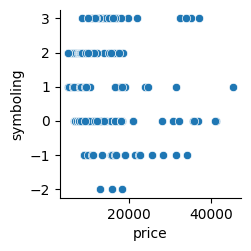

In [51]:
# Exploring "symboling" column :
sns.pairplot(y_vars = 'symboling', x_vars = 'price' ,data = cars_data)

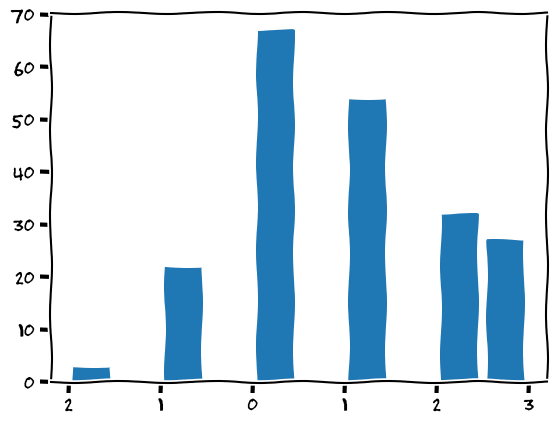

In [52]:
with plt.xkcd():
    plt.hist(cars_data["symboling"], bins=10, rwidth=0.8)

In [53]:
# Exploring Column CarName :
cars_data['CarName'].value_counts()

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64

In [54]:
# We create a new column "car_company" in our dataset :
cars_data['car_company'] = cars_data['CarName'].apply(lambda x:x.split(' ')[0]) 

In [56]:
# Rechecking :
cars_data['car_company'].head()

0    alfa-romero
1    alfa-romero
2    alfa-romero
3           audi
4           audi
Name: car_company, dtype: object

In [57]:
# Deleting the original column :
cars_data = cars_data.drop(['CarName'], axis =1)

In [58]:
# Exploring "car_company" column :
cars_data['car_company'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: car_company, dtype: int64

In [59]:
cars_data['car_company'].replace('toyouta', 'toyota',inplace=True)
cars_data['car_company'].replace('Nissan', 'nissan',inplace=True)
cars_data['car_company'].replace('maxda', 'mazda',inplace=True)
cars_data['car_company'].replace('vokswagen', 'volkswagen',inplace=True)
cars_data['car_company'].replace('vw', 'volkswagen',inplace=True)
cars_data['car_company'].replace('porcshce', 'porsche',inplace=True)

In [60]:
# Rechecking the data:
cars_data['car_company'].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: car_company, dtype: int64

In [61]:
cars_data['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [62]:
cars_data['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [63]:
cars_data['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [64]:
cars_data[['doornumber']].head()

,doornumber
0,two
1,two
2,two
3,four
4,four


In [65]:
def number_(x):
    return x.map({'four':4, 'two': 2})
    
cars_data['doornumber'] = cars_data[['doornumber']].apply(number_)
cars_data[['doornumber']].head()

,doornumber
0,2
1,2
2,2
3,4
4,4


In [66]:
# Rechecking :
cars_data['doornumber'].value_counts()

4    115
2     90
Name: doornumber, dtype: int64

In [67]:
cars_data['carbody'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [68]:
cars_data['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [69]:
cars_data['enginelocation'].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [70]:
cars_data['wheelbase'].value_counts().head()

94.5    21
93.7    20
95.7    13
96.5     8
97.3     7
Name: wheelbase, dtype: int64

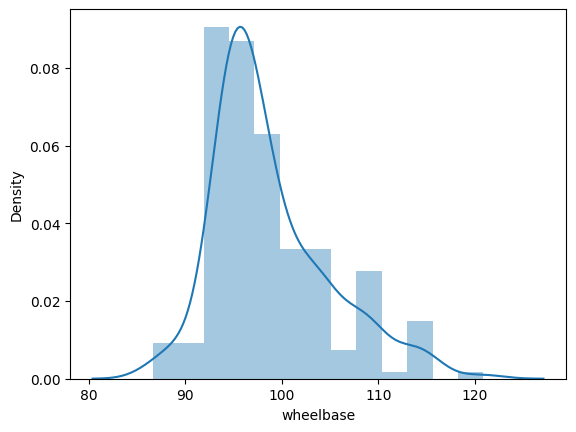

In [71]:
sns.distplot(cars_data['wheelbase'])
plt.show()

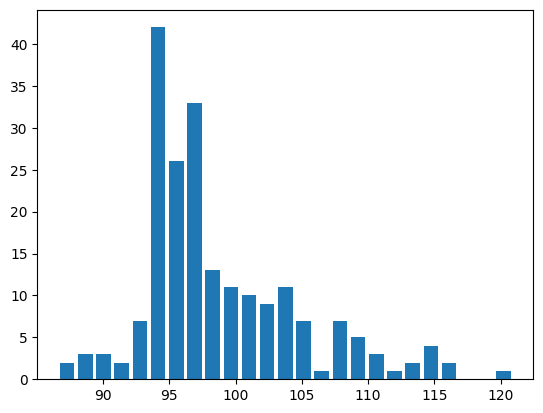

In [72]:
plt.hist(cars_data["wheelbase"], bins=25, rwidth=0.8)
plt.show()

In [73]:
cars_data['carlength'].value_counts().head()

157.3    15
188.8    11
171.7     7
186.7     7
166.3     7
Name: carlength, dtype: int64

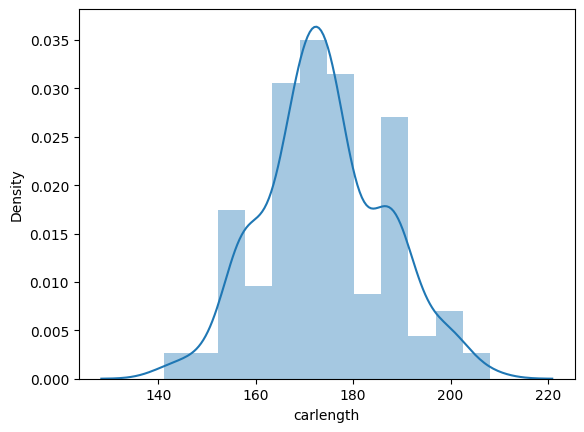

In [74]:
sns.distplot(cars_data['carlength'])
plt.show()

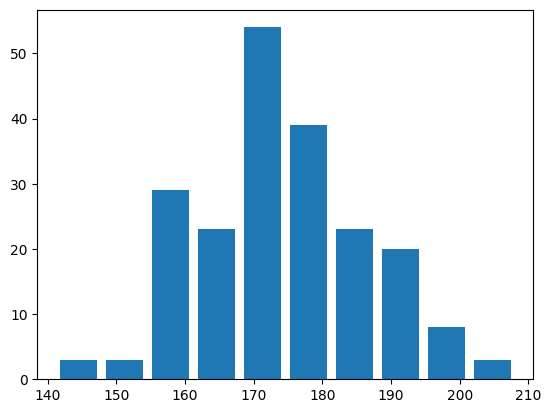

In [75]:
plt.hist(cars_data["carlength"], bins=10, rwidth=0.8)
plt.show()

In [77]:

cars_data['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [78]:
cars_data['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [80]:
def convert_number(x):
    return x.map({'four': 4,
                  'six': 6,
                  'five': 5,
                  'eight': 8,
                  'two': 2,
                  'three': 3,
                  'twelve': 12}
                 )

cars_data['cylindernumber'] = cars_data[['cylindernumber']].apply(convert_number)
cars_data['cylindernumber'].head()

0    4
1    4
2    6
3    4
4    5
Name: cylindernumber, dtype: int64

In [81]:
# Re-checking :
cars_data['cylindernumber'].value_counts()

4     159
6      24
5      11
8       5
2       4
3       1
12      1
Name: cylindernumber, dtype: int64

**Outliers**

In [82]:
cars_data['fuelsystem'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

In [83]:
cars_numeric = cars_data.select_dtypes(include =['int64','float64'])
cars_numeric.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0


<Figure size 3000x3000 with 0 Axes>

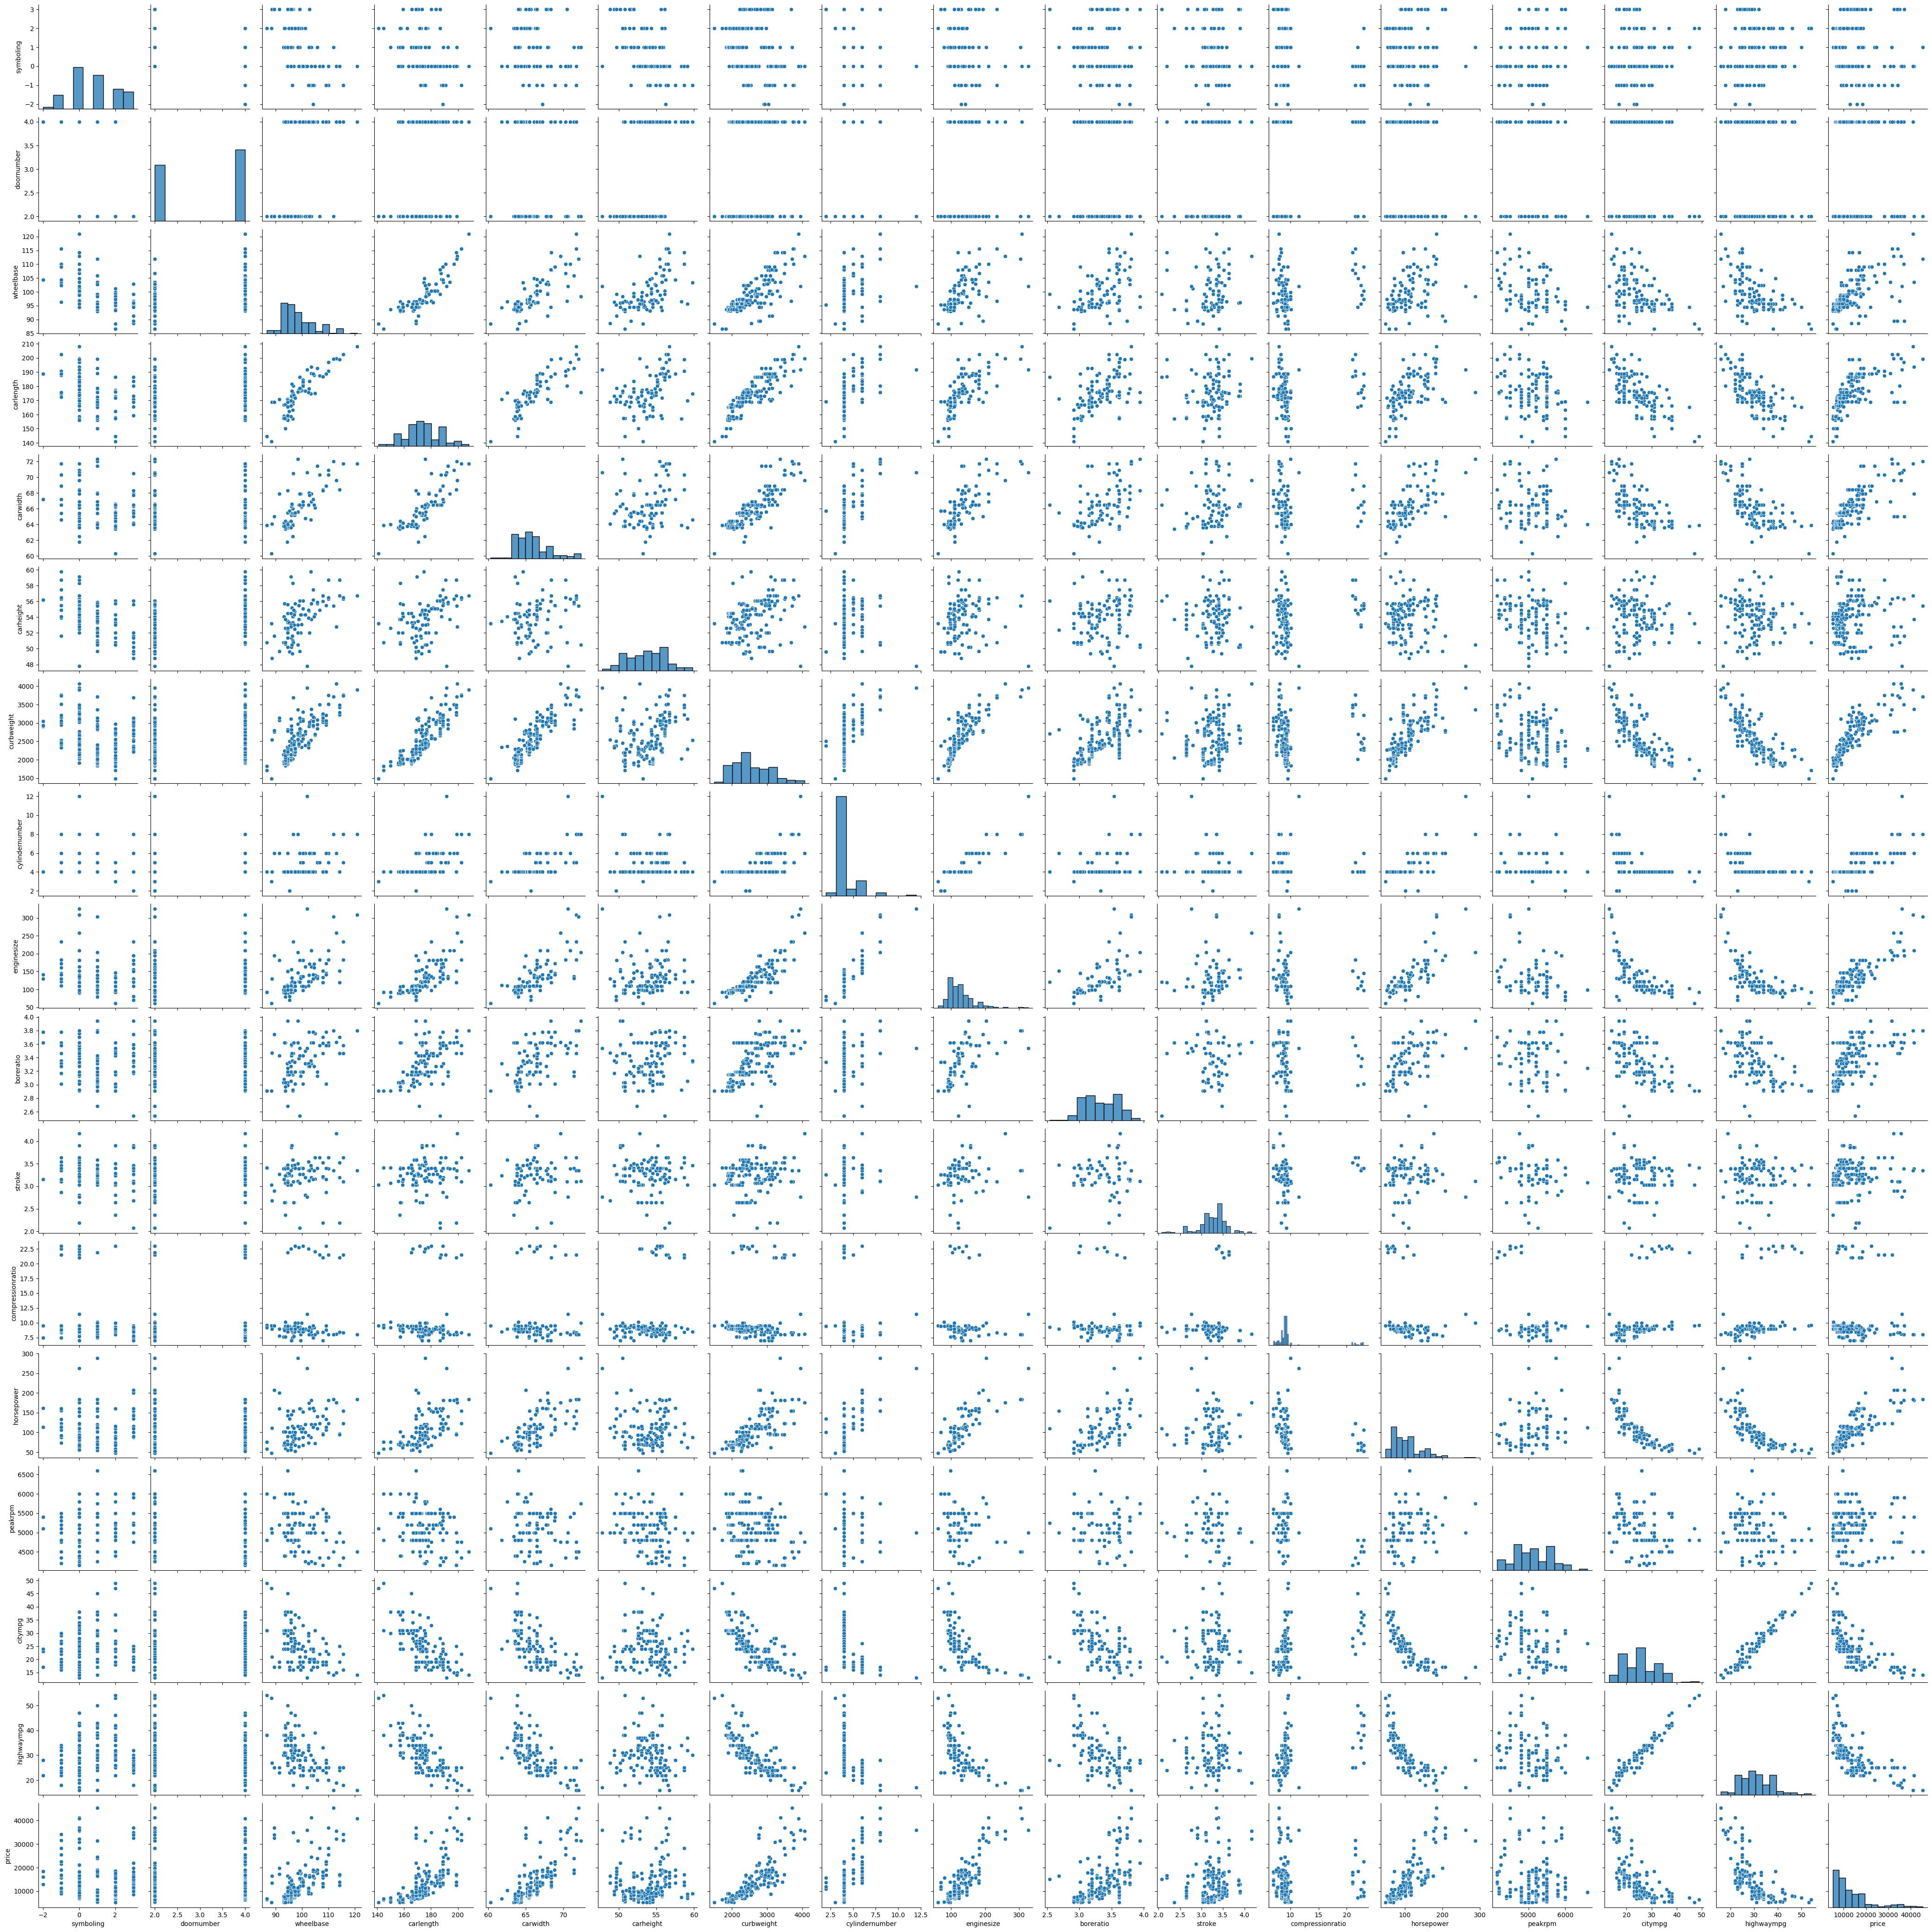

In [84]:
plt.figure(figsize = (30,30))
sns.pairplot(cars_numeric)
plt.show()

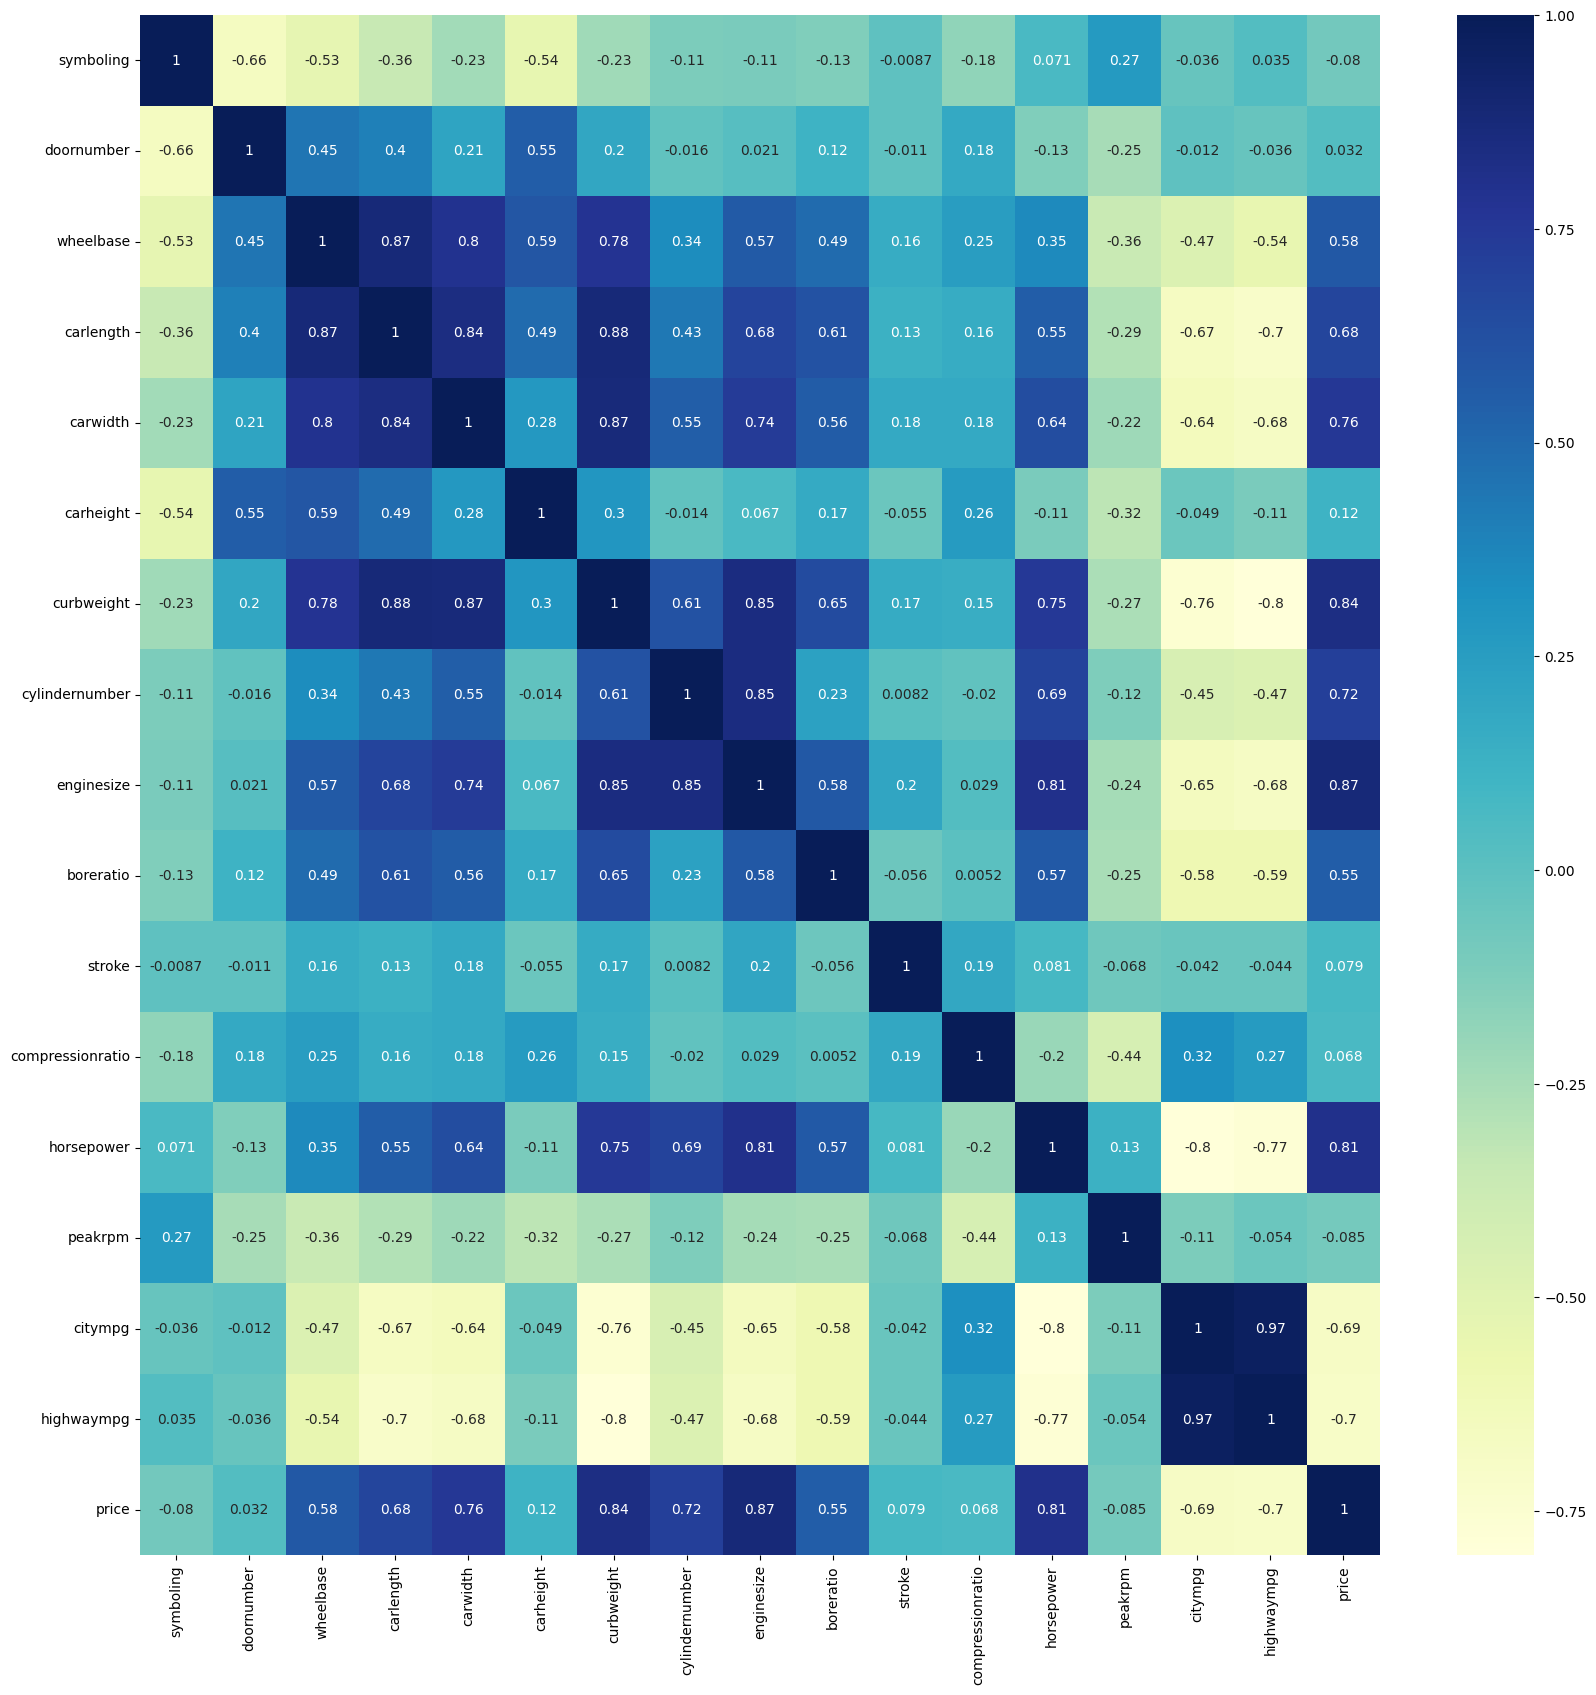

In [85]:
plt.figure(figsize = (20,20))
sns.heatmap(cars_data.corr(), annot = True ,cmap = 'YlGnBu')
plt.show()

In [86]:
categorical_cols = cars_data.select_dtypes(include=['object'])
categorical_cols.head()

,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem,car_company
0,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero
1,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero
2,gas,std,hatchback,rwd,front,ohcv,mpfi,alfa-romero
3,gas,std,sedan,fwd,front,ohc,mpfi,audi
4,gas,std,sedan,4wd,front,ohc,mpfi,audi


<Axes: xlabel='fuelsystem', ylabel='price'>

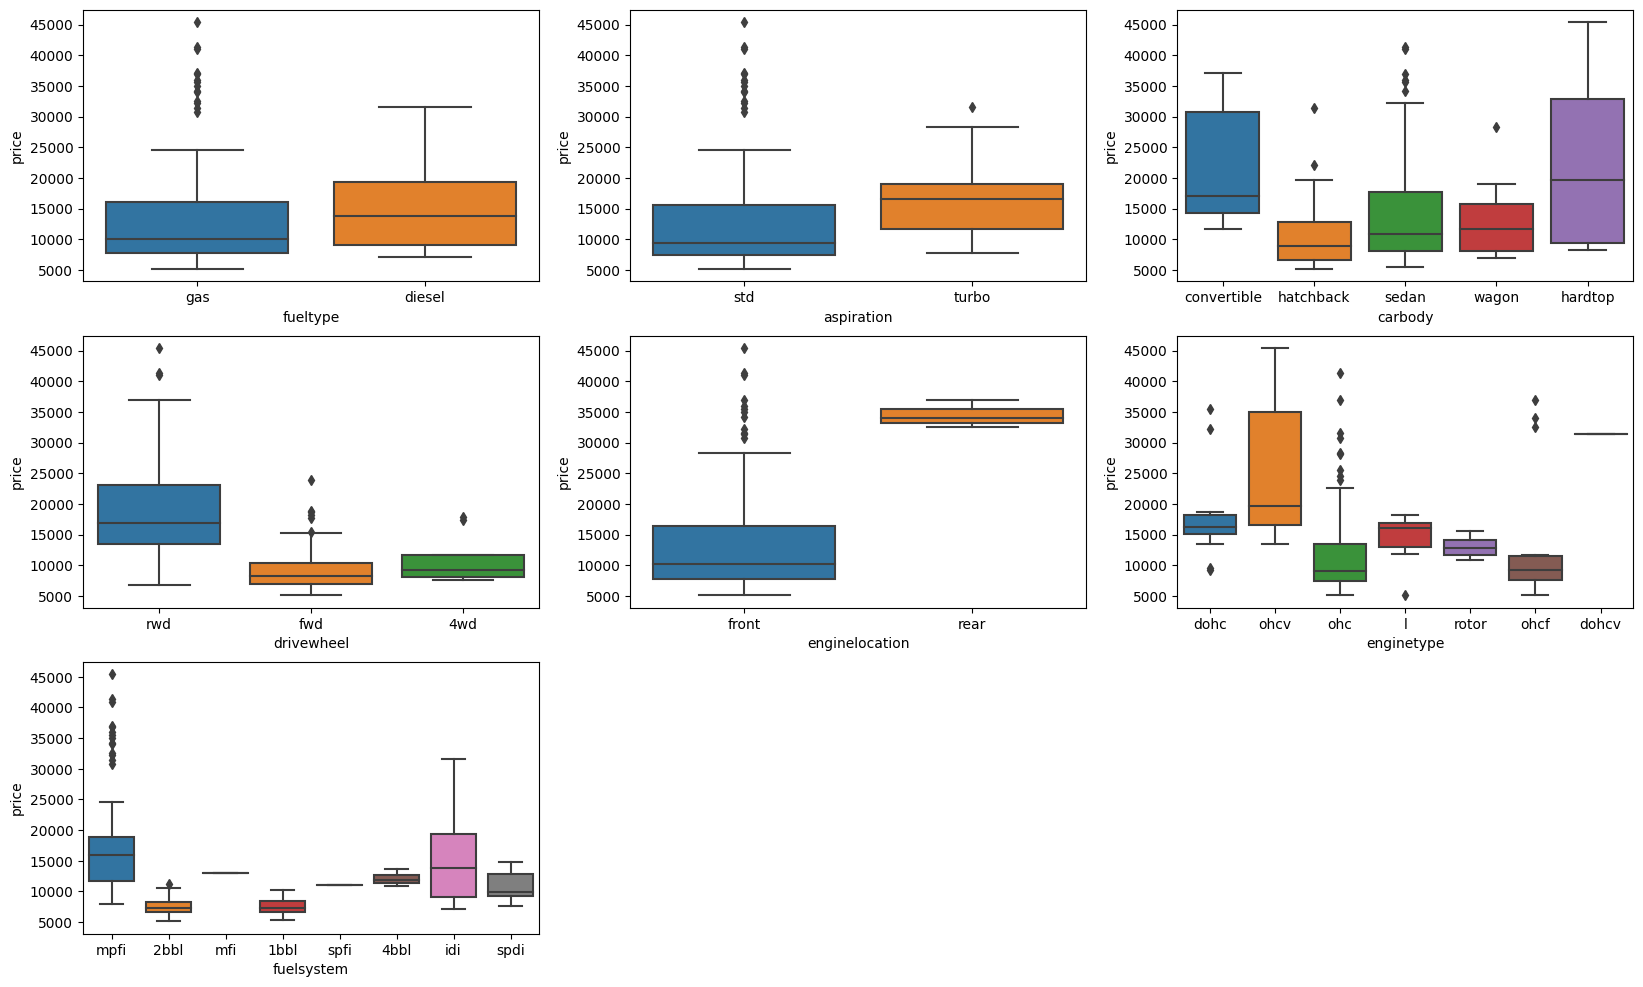

In [87]:
plt.figure(figsize=(20, 12))

plt.subplot(3, 3, 1) # 3 rows, 3 columns, 1st subplot = left
sns.boxplot(x='fueltype', y='price', data=cars_data)

plt.subplot(3, 3, 2) # 3 rows, 3 columns, 2nd subplot = middle
sns.boxplot(x='aspiration', y='price', data=cars_data)

plt.subplot(3, 3, 3) # 3 rows, 3 columns, 3rd subplot = right
sns.boxplot(x='carbody', y='price', data=cars_data)

plt.subplot(3, 3, 4)
sns.boxplot(x='drivewheel', y='price', data=cars_data)

plt.subplot(3, 3, 5)
sns.boxplot(x='enginelocation', y='price', data=cars_data)

plt.subplot(3, 3, 6)
sns.boxplot(x='enginetype', y='price', data=cars_data)

plt.subplot(3, 3, 7)
sns.boxplot(x='fuelsystem', y='price', data=cars_data)

<Axes: xlabel='car_company', ylabel='price'>

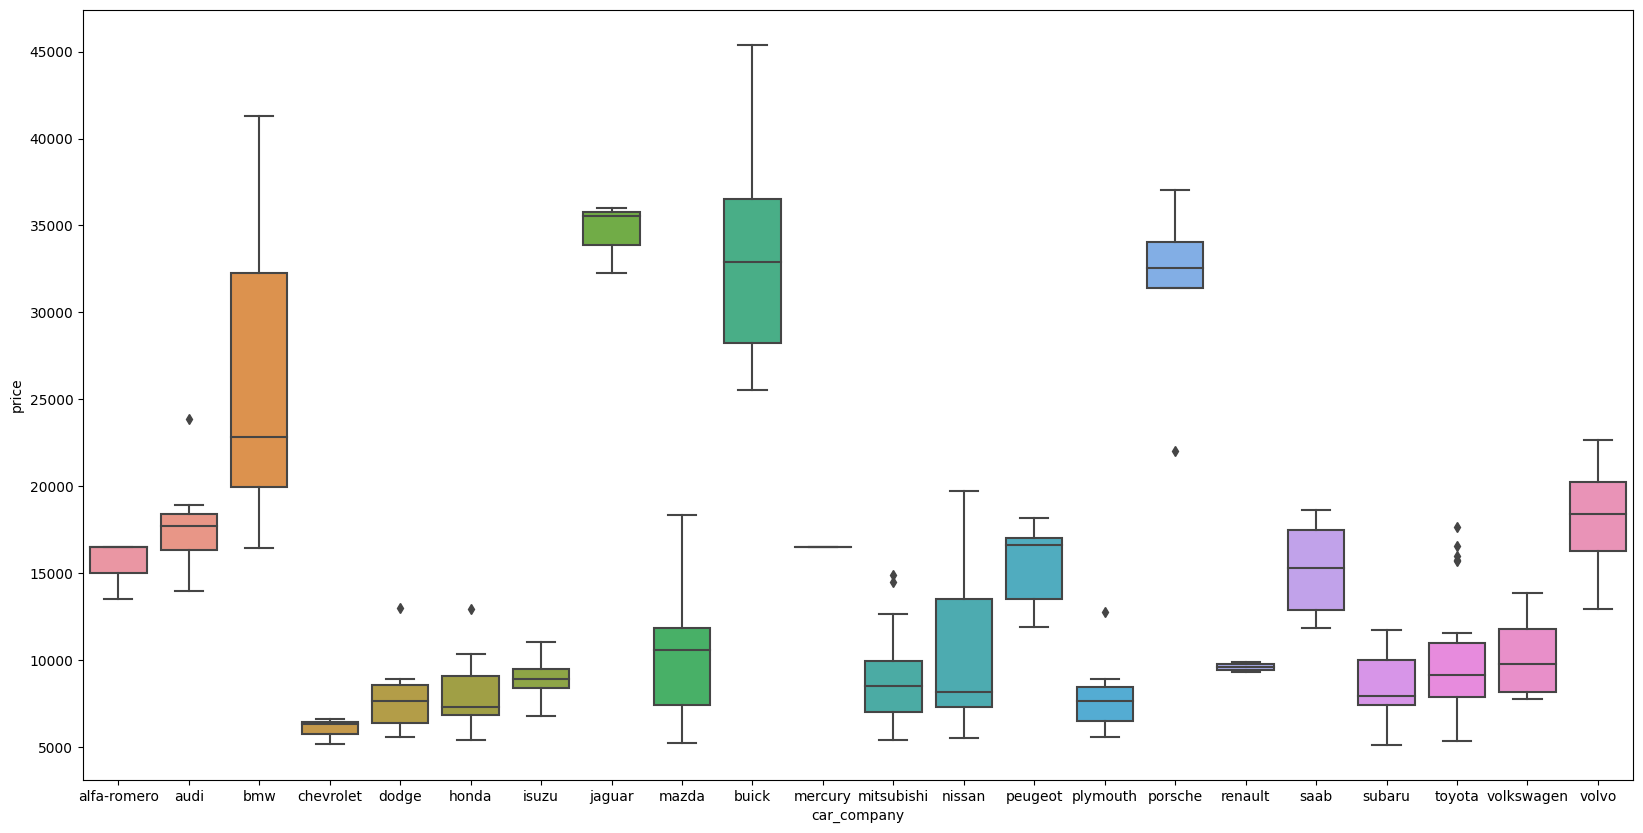

In [88]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='car_company', y='price', data=cars_data)

In [89]:
# Creating dummies for categorical data :
cars_dummies = pd.get_dummies(cars_data[categorical_cols.columns])

In [90]:
car_df = pd.concat([cars_data, cars_dummies], axis=1)

In [91]:
car_df = car_df.drop(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation',
                      'enginetype', 'fuelsystem', 'car_company'], axis=1)

In [92]:
car_df.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,0,0,0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,0,0,0
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,...,0,0,0,0,0,0,0,0,0,0
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,...,0,0,0,0,0,0,0,0,0,0
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,...,0,0,0,0,0,0,0,0,0,0


In [93]:
car_df=car_df.drop("cylindernumber",axis=1)
car_df.fillna(method="ffill")

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,3,2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,0,0,0
1,3,2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,0,0,0
2,1,2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,0,0,0,0,0,0,0,0,0
3,2,4,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,0,0,0,0,0,0
4,2,4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,4,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,...,0,0,0,0,0,0,0,0,0,1
201,-1,4,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,...,0,0,0,0,0,0,0,0,0,1
202,-1,4,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,...,0,0,0,0,0,0,0,0,0,1
203,-1,4,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,...,0,0,0,0,0,0,0,0,0,1


In [94]:
df_train, df_test = train_test_split(car_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [95]:
df_train.shape

(143, 67)

In [96]:
df_test.shape

(62, 67)

In [97]:
cars_numeric.columns

Index(['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price'],
      dtype='object')

In [98]:
col_list = ['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth','carheight', 'curbweight',  'enginesize', 'boreratio',
            'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

In [99]:
scaler = StandardScaler()

In [100]:
df_train[col_list] = scaler.fit_transform(df_train[col_list])

In [101]:
df_train.describe()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
count,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,3.726623e-17,9.937661e-17,1.565182e-15,1.614870e-16,-4.074441e-15,5.341493e-16,-1.614870e-16,-6.211038e-17,-1.062087e-15,2.141255e-15,...,0.097902,0.055944,0.027972,0.020979,0.013986,0.020979,0.076923,0.139860,0.048951,0.041958
std,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,...,0.298227,0.230621,0.165472,0.143818,0.117845,0.143818,0.267406,0.348061,0.216524,0.201198
min,-2.347020e+00,-1.126872e+00,-2.006930e+00,-2.574223e+00,-2.510760e+00,-2.371619e+00,-1.937401e+00,-1.566427e+00,-2.412359e+00,-3.403827e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.689008e-01,-1.126872e+00,-6.771770e-01,-6.186702e-01,-8.565171e-01,-7.222984e-01,-7.711028e-01,-6.847340e-01,-9.320600e-01,-4.497569e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.701590e-01,8.874120e-01,-3.405307e-01,-1.128552e-01,-1.993522e-01,6.112865e-02,-2.478347e-01,-3.663447e-01,9.948427e-03,6.399437e-02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.701590e-01,8.874120e-01,4.505882e-01,7.076008e-01,4.804736e-01,7.414732e-01,7.203955e-01,3.928914e-01,8.942829e-01,4.814173e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.848278e+00,8.874120e-01,2.874442e+00,2.324616e+00,2.927846e+00,2.287711e+00,2.812547e+00,4.923816e+00,2.432256e+00,2.953845e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [102]:
y_train = df_train.pop('price')
X_train = df_train

In [103]:
lr = LinearRegression()
model = lr.fit(X_train, y_train)

In [104]:
model.intercept_

-4981037234220.634

In [105]:
model.coef_

array([ 2.04990680e-03,  1.76813128e-02,  2.48764760e-01, -1.61295367e-01,
        2.33365449e-01, -1.72281904e-01,  3.78487200e-01,  5.95154777e-01,
       -1.52986476e-01, -3.20647736e-02, -6.70356877e-01, -1.49844794e-01,
        1.94097633e-01,  9.46021436e-02,  8.05601797e-02,  9.61603871e+11,
        5.02071235e+11,  1.37559060e+12,  1.37559060e+12,  1.16580689e+11,
        1.16580689e+11,  1.16580689e+11,  1.16580689e+11,  1.16580689e+11,
        1.18588988e+12,  1.18588988e+12,  1.18588988e+12,  6.00001988e+10,
       -2.61064389e+11,  4.96921613e+11,  4.96921613e+11,  4.96921613e+11,
        4.96921613e+11,  8.17986201e+11,  4.96921613e+11,  4.96921613e+11,
        1.77923080e+12,  1.77923080e+12,  1.77923080e+12,  1.31969816e+12,
       -1.11688936e+09,  1.77923080e+12,  1.77923080e+12,  4.38153834e+08,
       -5.35247775e+11, -5.35247775e+11, -5.35247775e+11, -5.35247775e+11,
       -5.35247775e+11, -5.35247775e+11, -5.35247775e+11, -5.35247775e+11,
       -5.35247775e+11, -

In [106]:
df_test[col_list] = scaler.transform(df_test[col_list])
y_test = df_test.pop('price')
X_test = df_test

In [107]:
y_pred = model.predict(X_test)

In [108]:
import sklearn
mse = sklearn.metrics.mean_squared_error(y_test,y_pred)

In [109]:
mse

1.0677792512414031e+23

In [110]:
r_squ = r2_score(y_test,y_pred)
r_squ

-9.228427906810988e+22

In [111]:
LRmodel = LinearRegression()
rfe = RFE(LRmodel, n_features_to_select=5, step=1)
rfe = rfe.fit(X_train, y_train)

In [112]:
rfe.n_features_

5

In [113]:
list(zip(X_train.columns, rfe.support_ ,rfe.ranking_))

[('symboling', False, 61),
 ('doornumber', False, 59),
 ('wheelbase', False, 36),
 ('carlength', False, 38),
 ('carwidth', False, 5),
 ('carheight', False, 37),
 ('curbweight', False, 16),
 ('enginesize', False, 13),
 ('boreratio', False, 34),
 ('stroke', False, 48),
 ('compressionratio', False, 20),
 ('horsepower', False, 43),
 ('peakrpm', False, 31),
 ('citympg', False, 28),
 ('highwaympg', False, 60),
 ('fueltype_diesel', False, 19),
 ('fueltype_gas', False, 17),
 ('aspiration_std', False, 15),
 ('aspiration_turbo', False, 40),
 ('carbody_convertible', False, 7),
 ('carbody_hardtop', False, 44),
 ('carbody_hatchback', False, 39),
 ('carbody_sedan', False, 45),
 ('carbody_wagon', False, 54),
 ('drivewheel_4wd', False, 53),
 ('drivewheel_fwd', False, 52),
 ('drivewheel_rwd', False, 46),
 ('enginelocation_front', True, 1),
 ('enginelocation_rear', True, 1),
 ('enginetype_dohc', False, 24),
 ('enginetype_dohcv', False, 25),
 ('enginetype_l', False, 3),
 ('enginetype_ohc', False, 22),
 (

In [114]:
cols = X_train.columns[rfe.support_]
cols

Index(['enginelocation_front', 'enginelocation_rear', 'car_company_bmw',
       'car_company_buick', 'car_company_jaguar'],
      dtype='object')

In [115]:
X_test2 = X_test[cols]                                                                                                                            
y_pred2 = rfe.predict(X_test)

In [116]:
import sklearn

mse = sklearn.metrics.mean_squared_error(y_test, y_pred2)
print("The Mean Squares Error is: ", mse)
print("The R-2 score is: ", r2_score(y_test, y_pred2))
print("The previous Mean Squares Error was: 4.430416020688372e+22")
print("The previous R-2 score was: -3.829047511137639e+22")

The Mean Squares Error is:  0.35170871119844743
The R-2 score is:  0.6960309463104104
The previous Mean Squares Error was: 4.430416020688372e+22
The previous R-2 score was: -3.829047511137639e+22


In [117]:
import sklearn

LRmodel = LinearRegression()
rfe = RFE(LRmodel, n_features_to_select=10, step=1)
rfe = rfe.fit(X_train, y_train)
rfe.n_features_
y_pred_ = rfe.predict(X_test)


mse = sklearn.metrics.mean_squared_error(y_test, y_pred_)
print("The Mean Squares Error is: ", mse)
print("The R-2 score is: ", r2_score(y_test, y_pred_))

The Mean Squares Error is:  0.15969736652255329
The R-2 score is:  0.8619793714714383


In [118]:
cols = X_train.columns[rfe.support_]
cols

Index(['carwidth', 'enginelocation_front', 'enginelocation_rear',
       'enginetype_l', 'car_company_alfa-romero', 'car_company_bmw',
       'car_company_buick', 'car_company_jaguar', 'car_company_peugeot',
       'car_company_porsche'],
      dtype='object')

In [119]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 56),
 ('doornumber', False, 54),
 ('wheelbase', False, 31),
 ('carlength', False, 33),
 ('carwidth', True, 1),
 ('carheight', False, 32),
 ('curbweight', False, 11),
 ('enginesize', False, 8),
 ('boreratio', False, 29),
 ('stroke', False, 43),
 ('compressionratio', False, 15),
 ('horsepower', False, 38),
 ('peakrpm', False, 26),
 ('citympg', False, 23),
 ('highwaympg', False, 55),
 ('fueltype_diesel', False, 14),
 ('fueltype_gas', False, 12),
 ('aspiration_std', False, 10),
 ('aspiration_turbo', False, 35),
 ('carbody_convertible', False, 2),
 ('carbody_hardtop', False, 39),
 ('carbody_hatchback', False, 34),
 ('carbody_sedan', False, 40),
 ('carbody_wagon', False, 49),
 ('drivewheel_4wd', False, 48),
 ('drivewheel_fwd', False, 47),
 ('drivewheel_rwd', False, 41),
 ('enginelocation_front', True, 1),
 ('enginelocation_rear', True, 1),
 ('enginetype_dohc', False, 19),
 ('enginetype_dohcv', False, 20),
 ('enginetype_l', True, 1),
 ('enginetype_ohc', False, 17),
 ('en

In [120]:
# Let's loop over our list where we have True :
[value for index,value in enumerate(list(zip(X_train.columns,rfe.support_,rfe.ranking_))) if value[2] == True]

[('carwidth', True, 1),
 ('enginelocation_front', True, 1),
 ('enginelocation_rear', True, 1),
 ('enginetype_l', True, 1),
 ('car_company_alfa-romero', True, 1),
 ('car_company_bmw', True, 1),
 ('car_company_buick', True, 1),
 ('car_company_jaguar', True, 1),
 ('car_company_peugeot', True, 1),
 ('car_company_porsche', True, 1)]